# Neural Nets - Multiclass, Batch Norm - MNIST

Rob Rappa
7/7/19

#Source - DataCamp - Deep Learning with Keras

In [9]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Read Data

In [10]:
#Read data in
digits = load_digits()
print(digits.data.shape)

(1797, 64)


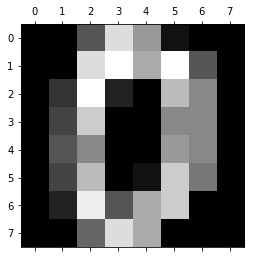

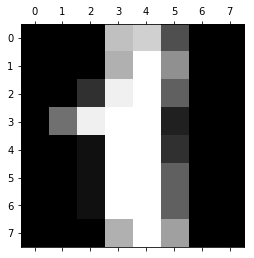

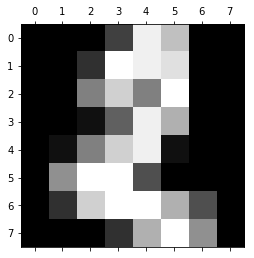

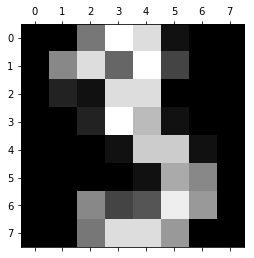

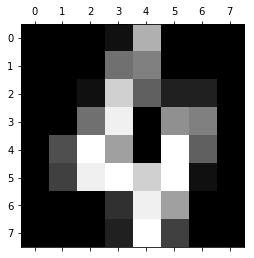

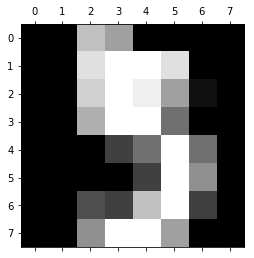

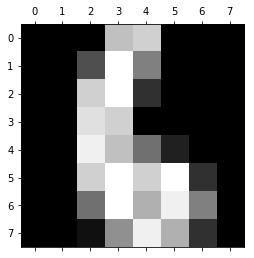

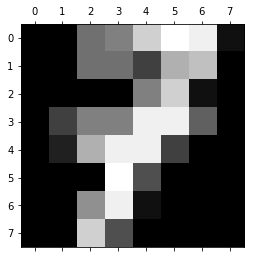

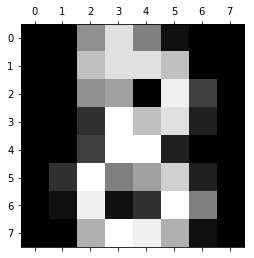

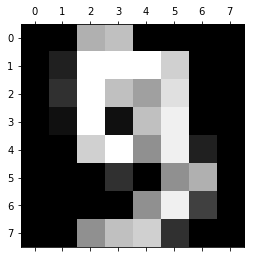

In [11]:
#Basic visualization
plt.gray() 
for i in range(10):
    plt.matshow(digits.images[i]) 
plt.show() 

In [28]:
#Original Shape of Pixel Data
digits.images.shape

(1797, 8, 8)

In [29]:
X = digits.images.reshape(1797,64)
X.shape

(1797, 64)

In [39]:
#Original Shape of Targets
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [44]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

y = to_categorical(digits.target)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',y)

One-hot encoded competitors: 
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [46]:
#Test, Train, Split

#Split data
X_train, X_test, y_train, y_test = train_test_split(X \
                                                    , y, test_size=0.33, random_state=42)

### Build Architecture

In [52]:
#Build Model without Batch Normalization

# Build your deep network (WITHOUT BatchNormalization())
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Summary
standard_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                510       
Total params: 8,860
Trainable params: 8,860
Non-trainable params: 0
_________________________________________________________________


In [53]:
#Build Model with Batch Normalization

# Build your deep network (WITH BatchNormalization())
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


#Summary
batchnorm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                3250      
_________________________________________________________________
batch_normalization_10 (Batc (None, 50)                200       
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_11 (Batc (None, 50)                200       
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_12 (Batc (None, 50)                200       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                510       
Total para

In [67]:
#Include Keras Callbacks

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=10)


# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_multiclassdigit_model.hdf5', save_best_only=True)

### Fit Model

In [68]:
# Train your standard model, storing its history
history1 = standard_model.fit(X_train, y_train, validation_data=(X_test,y_test), \
                              epochs=10, verbose=0, \
                              callbacks=[monitor_val_acc,modelCheckpoint])

# Train the batch normalized model you recently built, store its history
history2 = batchnorm_model.fit(X_train, y_train, validation_data=(X_test,y_test), \
                              epochs=10, verbose=0, \
                              callbacks=[monitor_val_acc,modelCheckpoint])


### Evaluate Performance

In [69]:
#Function for comparing histories

def compare_histories_acc(h1,h2):
  plt.plot(h1.history['acc'])
  plt.plot(h1.history['val_acc'])
  plt.plot(h2.history['acc'])
  plt.plot(h2.history['val_acc'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

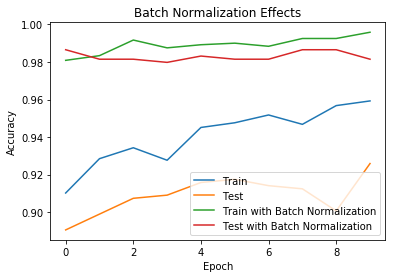

In [70]:
# Call compare_acc_histories passing in both model histories
compare_histories_acc(history1, history2)